# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Importation des bibliothèques

In [35]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

Paramétrage du graphique

In [36]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
## file_1 =

Importation du fichier .csv

In [37]:
# TODO : make 
df = pd.read_csv('Churn_Modelling.csv') #into a dataframe called df

In [38]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

14 variables 

In [39]:
# TODO : output the first 5 lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df['Exited'] == 1]  # Customers who left
df_1 = df[df['Exited'] == 0]  # Customers who did not leave

## Hypothesis 1: Age

In [41]:
# TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

C:\Users\AQS_PSTB\AppData\Local\Temp\ipykernel_13320\1585005001.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_0['Age'], shade=True, color="red", label="Exited (Left)")
C:\Users\AQS_PSTB\AppData\Local\Temp\ipykernel_13320\1585005001.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_1['Age'], shade=True, color="green", label="Stayed")


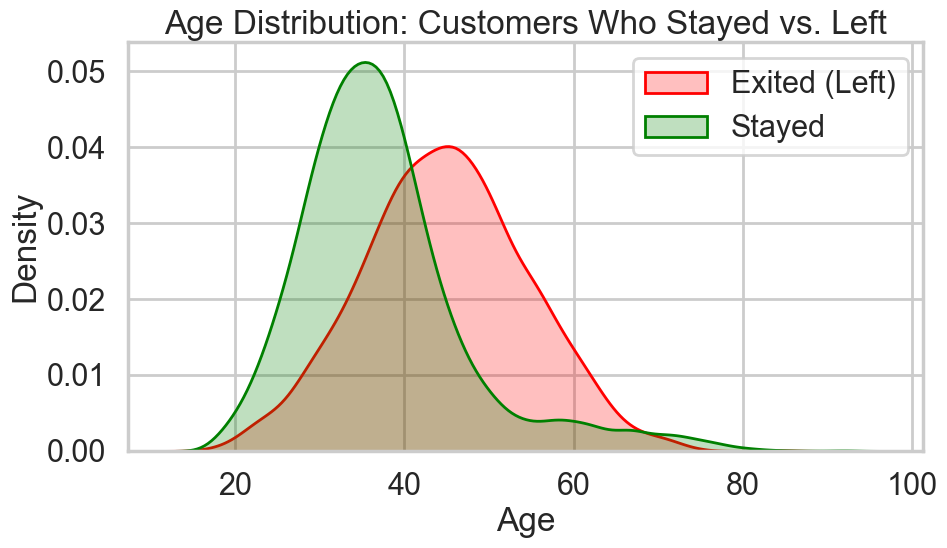

In [42]:
df_0 = df[df['Exited'] == 1]  # Customers who left
df_1 = df[df['Exited'] == 0]  # Customers who stayed

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_context("poster")

# Plot age distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(df_0['Age'], shade=True, color="red", label="Exited (Left)")
sns.kdeplot(df_1['Age'], shade=True, color="green", label="Stayed")

plt.title('Age Distribution: Customers Who Stayed vs. Left')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

The (red) column "Exited" in the Churn_Modelling.csv dataset indicates that the customer left (1) 
The (green) column "stayed" in the Churn_Modelling.csv dataset indicates that the customer stayed (0)

In [43]:
## TODO: # Customers who stayed (Exited == 0)
df_1 = df[df['Exited'] == 0]

# Calculate mean and standard deviation of Age
mean_age = df_1['Age'].mean()
std_age = df_1['Age'].std()

print(f"Mean Age (Stayed): {mean_age:.2f}")
print(f"Standard Deviation of Age (Stayed): {std_age:.2f}")
# Output Example (may vary based on actual data):

#Mean Age (Stayed): 37.61
#Standard Deviation of Age (Stayed): 9.09

Mean Age (Stayed): 37.41
Standard Deviation of Age (Stayed): 10.13


In [44]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
# Customers who left (Exited == 1)
df_0 = df[df['Exited'] == 1]

# Calculate mean and standard deviation of Age
mean_age_left = df_0['Age'].mean()
std_age_left = df_0['Age'].std()

print(f"Mean Age (Left): {mean_age_left:.2f}")
print(f"Standard Deviation of Age (Left): {std_age_left:.2f}")

Mean Age (Left): 44.84
Standard Deviation of Age (Left): 9.76


In [45]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
from scipy.stats import ttest_ind

# Separate the age data
ages_left = df[df['Exited'] == 1]['Age']
ages_stayed = df[df['Exited'] == 0]['Age']

# Perform Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(ages_left, ages_stayed, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

T-statistic: 30.4192
P-value: 4.7127e-179


### Using Bootstrapping

In [46]:
# TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.

import numpy as np

def bootstrap_statistic(data, stat_func=np.mean, n_bootstrap=1000, random_seed=None):
    """
    
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    data = np.array(data)
    bootstrap_stats = []

    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        stat = stat_func(sample)
        bootstrap_stats.append(stat)

    return np.array(bootstrap_stats)


In [47]:
# TODO: Calculate the difference in means and shift the ages to the overall mean.
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Step 1: Calculate the overall mean of the 'Age' column
overall_mean_age = df['Age'].mean()

# Step 2: Subtract the overall mean from each value (center the data)
df['Age_Centered'] = df['Age'] - overall_mean_age

# Step 3: To "shift" ages back to the overall mean, add the overall mean to the centered data
df['Age_Shifted'] = df['Age_Centered'] + overall_mean_age

# Step 4: Calculate the difference between means (should be 0 for centered, and same as original for shifted)
original_mean = df['Age'].mean()
shifted_mean = df['Age_Shifted'].mean()
difference_in_means = original_mean - shifted_mean

# Output the results
print(f"Original Mean Age: {original_mean}")
print(f"Shifted Mean Age: {shifted_mean}")
print(f"Difference in Means: {difference_in_means}")


Original Mean Age: 38.9218
Shifted Mean Age: 38.9218
Difference in Means: 0.0


Standard Deviation of Mean Age (Exited=0): 0.112
Standard Deviation of Mean Age (Exited=1): 0.212
Standard Deviation of Difference in Means: 0.242


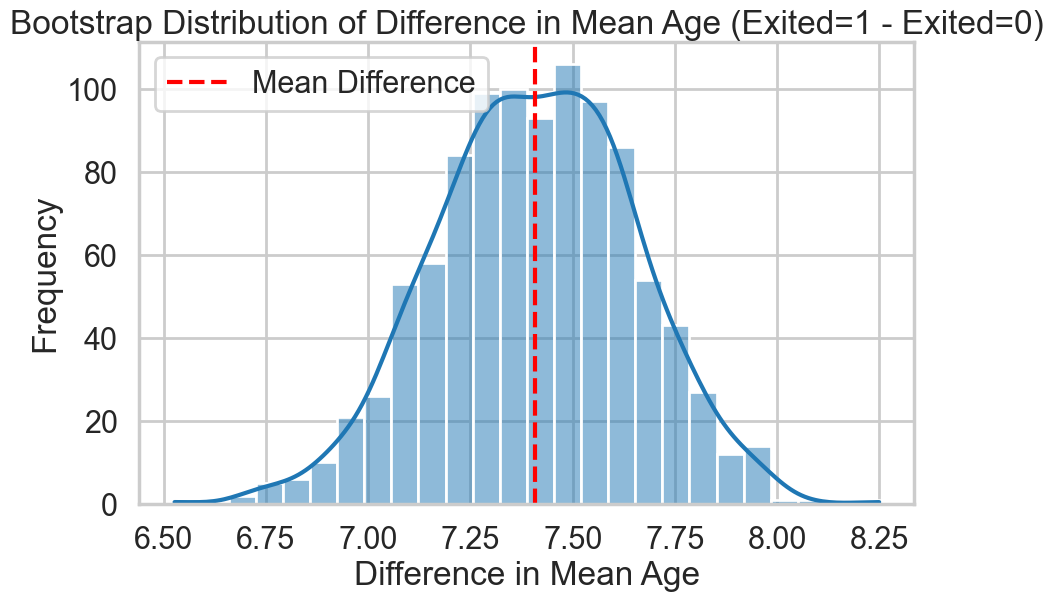

In [48]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
# Parameters
n_iterations = 1000
sample_size = len(df)

# Arrays to hold bootstrap means
bootstrap_means_0 = []
bootstrap_means_1 = []
bootstrap_diff = []

# Bootstrap loop
for _ in range(n_iterations):
    # Sample with replacement
    sample = df.sample(n=sample_size, replace=True)
    
    # Calculate group means
    mean_0 = sample[sample['Exited'] == 0]['Age'].mean()
    mean_1 = sample[sample['Exited'] == 1]['Age'].mean()
    
    # Store results
    bootstrap_means_0.append(mean_0)
    bootstrap_means_1.append(mean_1)
    bootstrap_diff.append(mean_1 - mean_0)

# Convert to numpy arrays
bootstrap_means_0 = np.array(bootstrap_means_0)
bootstrap_means_1 = np.array(bootstrap_means_1)
bootstrap_diff = np.array(bootstrap_diff)

# Calculate standard deviations
std_0 = np.std(bootstrap_means_0, ddof=1)
std_1 = np.std(bootstrap_means_1, ddof=1)
std_diff = np.std(bootstrap_diff, ddof=1)

# Print results
print(f"Standard Deviation of Mean Age (Exited=0): {std_0:.3f}")
print(f"Standard Deviation of Mean Age (Exited=1): {std_1:.3f}")
print(f"Standard Deviation of Difference in Means: {std_diff:.3f}")

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diff, kde=True)
plt.axvline(bootstrap_diff.mean(), color='red', linestyle='--', label='Mean Difference')
plt.title('Bootstrap Distribution of Difference in Mean Age (Exited=1 - Exited=0)')
plt.xlabel('Difference in Mean Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
# Step 1: Compute observed difference in mean Age
observed_diff = df[df['Exited'] == 1]['Age'].mean() - df[df['Exited'] == 0]['Age'].mean()

# Step 2: Compute two-tailed p-value
# Count how many bootstrap differences are more extreme than the observed
extreme_count = np.sum(np.abs(bootstrap_diff) >= np.abs(observed_diff))
p_value = extreme_count / len(bootstrap_diff)

# Output the results
print(f"Observed Difference in Means: {observed_diff:.3f}")
print(f"Bootstrap p-value (two-tailed): {p_value:.4f}")

# If p-value < 0.05, the difference in mean age between the churned and non-churne d groups is statistically significant.

# If p-value ≥ 0.05, we fail to reject the null hypothesis that there is no difference in mean age between the groups.


Observed Difference in Means: 7.430
Bootstrap p-value (two-tailed): 0.4840


### Conclusion
Do we reject the Null Hypothesis ? Why ?

We cannot reject the null hypothesis because p-value is >= 0.05.
As a consequence, mean age is not statistically significant for customer churning.

## Hypothesis 2: Credit Score

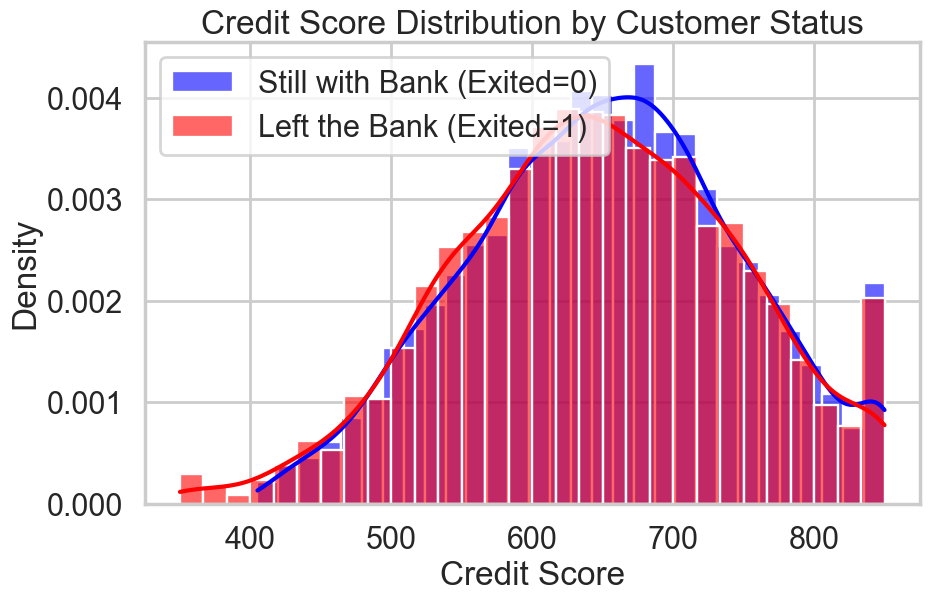

In [19]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
plt.figure(figsize=(10, 6))

# Plot histogram for customers who stayed
sns.histplot(df[df['Exited'] == 0]['CreditScore'], color='blue', label='Still with Bank (Exited=0)', kde=True, stat="density", bins=30, alpha=0.6)

# Plot histogram for customers who left
sns.histplot(df[df['Exited'] == 1]['CreditScore'], color='red', label='Left the Bank (Exited=1)', kde=True, stat="density", bins=30, alpha=0.6)

plt.title('Credit Score Distribution by Customer Status')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [25]:
# TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
from scipy.stats import ttest_ind

# Separate the two groups
credit_scores_stayed = df[df['Exited'] == 0]['CreditScore']
credit_scores_left = df[df['Exited'] == 1]['CreditScore']

# Perform independent two-sample t-test (assume unequal variances with equal_var=False)
t_stat, p_value = ttest_ind(credit_scores_stayed, credit_scores_left, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

#T-statistic: Measures the difference in means relative to the variation in your samples.

#P-value:

#If p < 0.05, there is a statistically significant difference in credit scores between the two groups.

#If p >= 0.05, the difference is not statistically significant.

print(f"Mean CreditScore (Still with Bank): {credit_scores_stayed.mean():.2f}")
print(f"Mean CreditScore (Left the Bank): {credit_scores_left.mean():.2f}")



T-statistic: 2.635
P-value: 0.0085
Mean CreditScore (Still with Bank): 651.85
Mean CreditScore (Left the Bank): 645.35


### Conclusion
Do we reject the Null Hypothesis ? Why ?

P-value: 0.0085
So, p-value < 0.05
We reject the null hypothesis because there is a statistically significant difference in credit scores between the two groups.

## Hypothesis 3: Balance

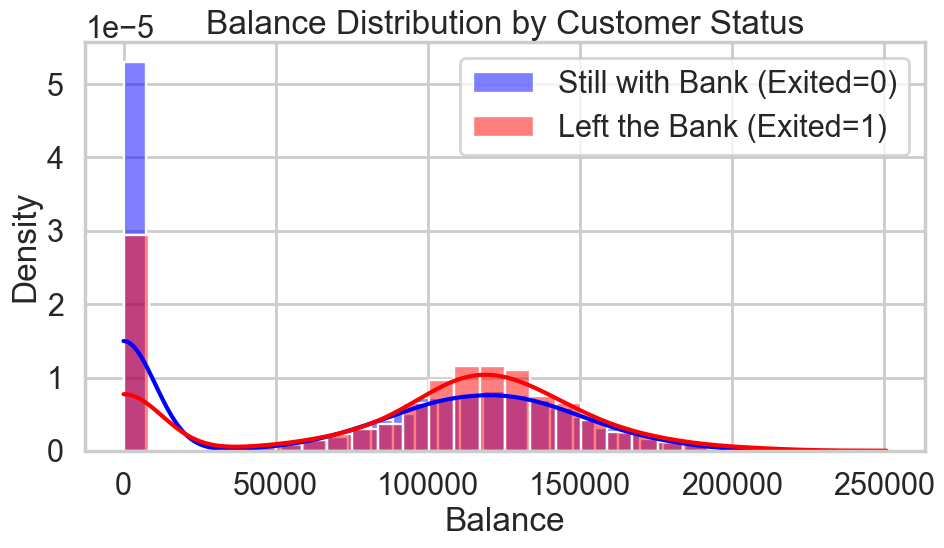

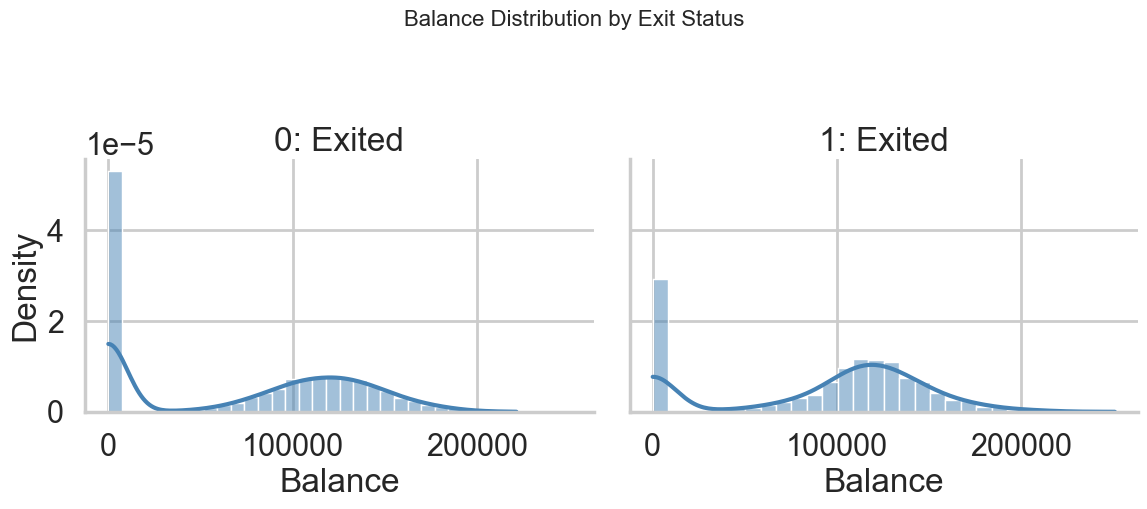

In [26]:
# TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
#Overlaid Histogram with KDE

plt.figure(figsize=(10, 6))

# Plot for customers who stayed
sns.histplot(df[df['Exited'] == 0]['Balance'], 
             color='blue', label='Still with Bank (Exited=0)', 
             kde=True, stat="density", bins=30, alpha=0.5)

# Plot for customers who left
sns.histplot(df[df['Exited'] == 1]['Balance'], 
             color='red', label='Left the Bank (Exited=1)', 
             kde=True, stat="density", bins=30, alpha=0.5)

plt.title('Balance Distribution by Customer Status')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

#Side-by-Side (Faceted) Histogram
g = sns.FacetGrid(df, col="Exited", height=5, aspect=1.2)
g.map_dataframe(sns.histplot, x="Balance", bins=30, kde=True, stat='density', color='steelblue')
g.set_titles(col_template="{col_name}: Exited")
g.set_axis_labels("Balance", "Density")
plt.suptitle("Balance Distribution by Exit Status", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
# TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
from scipy.stats import ttest_ind

# Separate the Balance data for each group
balance_stayed = df[df['Exited'] == 0]['Balance']
balance_left = df[df['Exited'] == 1]['Balance']

# Perform independent two-sample t-test (Welch's t-test, unequal variances)
t_stat, p_value = ttest_ind(balance_stayed, balance_left, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

print(f"Mean Balance (Still with Bank): {balance_stayed.mean():.2f}")
print(f"Mean Balance (Left the Bank): {balance_left.mean():.2f}")


#P-value < 0.05: Statistically significant difference in Balance between the two groups.
#T-statistic: Indicates the direction and magnitude of the difference.
#Comparing the mean balances helps contextualize the result.


T-statistic: -12.471
P-value: 0.0000
Mean Balance (Still with Bank): 72745.30
Mean Balance (Left the Bank): 91108.54


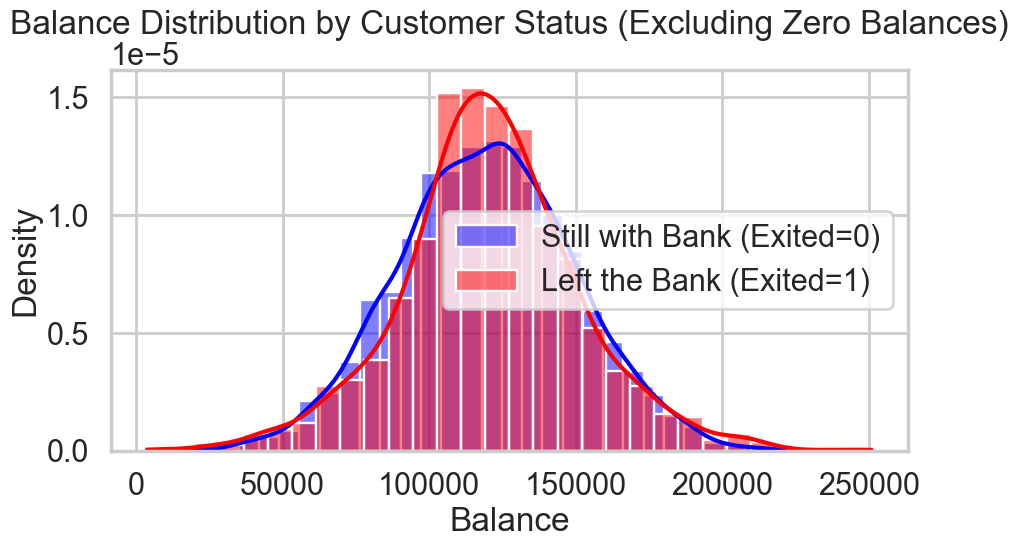

In [28]:
# TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
# Filter out rows where Balance is zero
df_nonzero_balance = df[df['Balance'] > 0]

# Plot
plt.figure(figsize=(10, 6))

# Plot for customers who stayed
sns.histplot(df_nonzero_balance[df_nonzero_balance['Exited'] == 0]['Balance'], 
             color='blue', label='Still with Bank (Exited=0)', 
             kde=True, stat="density", bins=30, alpha=0.5)

# Plot for customers who left
sns.histplot(df_nonzero_balance[df_nonzero_balance['Exited'] == 1]['Balance'], 
             color='red', label='Left the Bank (Exited=1)', 
             kde=True, stat="density", bins=30, alpha=0.5)

plt.title('Balance Distribution by Customer Status (Excluding Zero Balances)')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

## Conclusion

Do we reject the Null Hypothesis ? Why ?

#P-value < 0.05: Statistical difference in Balance between the two groups is significant.
So, we reject the null hypothesis (that there is no difference between the two groups).

## Hypothesis 4: Estimated Salary

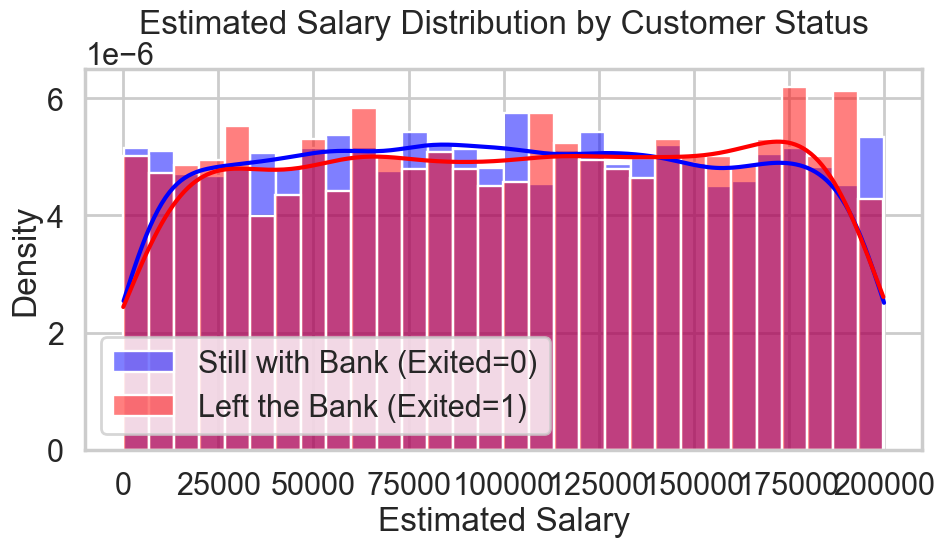

In [29]:
# TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
plt.figure(figsize=(10, 6))

# Plot for customers who stayed
sns.histplot(df[df['Exited'] == 0]['EstimatedSalary'], 
             color='blue', label='Still with Bank (Exited=0)', 
             kde=True, stat="density", bins=30, alpha=0.5)

# Plot for customers who left
sns.histplot(df[df['Exited'] == 1]['EstimatedSalary'], 
             color='red', label='Left the Bank (Exited=1)', 
             kde=True, stat="density", bins=30, alpha=0.5)

plt.title('Estimated Salary Distribution by Customer Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
# TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
from scipy.stats import ttest_ind

# Separate EstimatedSalary by group
salary_stayed = df[df['Exited'] == 0]['EstimatedSalary']
salary_left = df[df['Exited'] == 1]['EstimatedSalary']

# Perform independent two-sample t-test (Welch's t-test)
t_stat, p_value = ttest_ind(salary_stayed, salary_left, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

print(f"Mean EstimatedSalary (Stayed): {salary_stayed.mean():.2f}")
print(f"Mean EstimatedSalary (Left): {salary_left.mean():.2f}")


T-statistic: -1.203
P-value: 0.2289
Mean EstimatedSalary (Stayed): 99738.39
Mean EstimatedSalary (Left): 101465.68


### Using Bootstrapping

In [31]:
# TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
# Means of EstimatedSalary by group
mean_stayed = df[df['Exited'] == 0]['EstimatedSalary'].mean()
mean_left = df[df['Exited'] == 1]['EstimatedSalary'].mean()

# Difference in means
diff_means = mean_left - mean_stayed

print(f"Mean EstimatedSalary (Stayed): {mean_stayed:.2f}")
print(f"Mean EstimatedSalary (Left): {mean_left:.2f}")
print(f"Difference in Means: {diff_means:.2f}")

# Overall mean EstimatedSalary
overall_mean_salary = df['EstimatedSalary'].mean()

# Shift EstimatedSalary for each group: subtract group mean, add overall mean
df['EstimatedSalary_Shifted'] = df.apply(
    lambda row: row['EstimatedSalary'] - (mean_left if row['Exited'] == 1 else mean_stayed) + overall_mean_salary,
    axis=1
)

# Check means after shifting (should be close to overall mean)
mean_shifted_stayed = df[df['Exited'] == 0]['EstimatedSalary_Shifted'].mean()
mean_shifted_left = df[df['Exited'] == 1]['EstimatedSalary_Shifted'].mean()

print(f"Shifted Mean EstimatedSalary (Stayed): {mean_shifted_stayed:.2f}")
print(f"Shifted Mean EstimatedSalary (Left): {mean_shifted_left:.2f}")

Mean EstimatedSalary (Stayed): 99738.39
Mean EstimatedSalary (Left): 101465.68
Difference in Means: 1727.29
Shifted Mean EstimatedSalary (Stayed): 100090.24
Shifted Mean EstimatedSalary (Left): 100090.24


In [32]:
# TODO: Calculate the bootstrap sample means for both groups and their difference.
import numpy as np

# Parameters
n_iterations = 1000  # number of bootstrap samples
sample_size = len(df)

# Containers for bootstrap means
bootstrap_means_stayed = []
bootstrap_means_left = []
bootstrap_diff = []

# Bootstrap loop
for _ in range(n_iterations):
    # Sample with replacement from the entire dataframe
    sample = df.sample(n=sample_size, replace=True)
    
    # Calculate means for each group in the bootstrap sample
    mean_stayed = sample[sample['Exited'] == 0]['EstimatedSalary'].mean()
    mean_left = sample[sample['Exited'] == 1]['EstimatedSalary'].mean()
    
    # Store the results
    bootstrap_means_stayed.append(mean_stayed)
    bootstrap_means_left.append(mean_left)
    bootstrap_diff.append(mean_left - mean_stayed)

# Convert to numpy arrays for easier handling
bootstrap_means_stayed = np.array(bootstrap_means_stayed)
bootstrap_means_left = np.array(bootstrap_means_left)
bootstrap_diff = np.array(bootstrap_diff)

# Print summary statistics
print(f"Bootstrap Mean EstimatedSalary (Stayed): {bootstrap_means_stayed.mean():.2f} ± {bootstrap_means_stayed.std(ddof=1):.2f}")
print(f"Bootstrap Mean EstimatedSalary (Left): {bootstrap_means_left.mean():.2f} ± {bootstrap_means_left.std(ddof=1):.2f}")
print(f"Bootstrap Difference in Means: {bootstrap_diff.mean():.2f} ± {bootstrap_diff.std(ddof=1):.2f}")


Bootstrap Mean EstimatedSalary (Stayed): 99726.60 ± 661.78
Bootstrap Mean EstimatedSalary (Left): 101423.89 ± 1282.67
Bootstrap Difference in Means: 1697.29 ± 1438.77


In [33]:
# TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
# Calculate observed difference in means from original data
observed_diff = df[df['Exited'] == 1]['EstimatedSalary'].mean() - df[df['Exited'] == 0]['EstimatedSalary'].mean()

# Calculate two-tailed p-value based on bootstrap distribution
extreme_count = np.sum(np.abs(bootstrap_diff) >= np.abs(observed_diff))
p_value = extreme_count / len(bootstrap_diff)

print(f"Observed difference in means: {observed_diff:.2f}")
print(f"Bootstrap p-value (two-tailed): {p_value:.4f}")


Observed difference in means: 1727.29
Bootstrap p-value (two-tailed): 0.4940


### Conclusion
Do we reject the Null Hypothesis ? Why ?

p-value (two-tailed): 0.4940
There is no statistical difference in estimated salary between the two groups.
So, we cannot reject the null hypothesis (that there is no difference between the two groups).

## Final Conclusion
What will be the most helpful feature in predicting churning?
Two features will be helpful in predicting churning:
- Credit Scord
- Balance
The most helpful feature, among the two is Balance, because in that case, there is a really noticeable difference between customers who leave the bank and customers who stay (there is no noticeable difference in that concern for Credit Score). 